In [1]:
import sys
sys.path.insert(0, '../../')
import ccal

%matplotlib inline

==================== Computational Cancer Analysis Library ====================

<11:54:45.576457> Checking dependencies ...
<11:54:45.578980> Using the following packages:
<11:54:45.581772> 	matplotlib (v1.5.1)
<11:54:45.581819> 	numpy (v1.10.4)
<11:54:45.581842> 	pandas (v0.18.0)
<11:54:45.581926> 	rpy2 (v2.8.0)
<11:54:45.581951> 	scikit-learn (v0.17.1)
<11:54:45.581967> 	scipy (v0.17.0)
<11:54:45.581985> 	seaborn (v0.7.0)


In [5]:
features = ccal.support.read_gct('../../data/HNSCC_PATHWAYS.v2.gct')
refs = ccal.support.read_gct('../../data/additional_YAP_signatures.gct').ix[:1, :]  # Demo only 3 rows
output_directory = '../../data/sample_output'

OSError: File b'../../data/HNSCC_PATHWAYS.v2.gct' does not exist

# rank_features_agaisnt_reference

<21:29:24.374868> Path /Users/Kwat/binf/cca/data/sample_output doesn't exist, creating it ...
<21:29:24.375589> Computing features vs. siTAZ_DN (1/3) using information metric ...
<21:29:24.375787> Using 566 intersecting columns from features and ref, which have 566 and 566 columns respectively ...
<21:29:27.020152> Plotting top 0.95 features vs. ref ...
<21:29:27.020219> Normalizing continuous features and ref ...


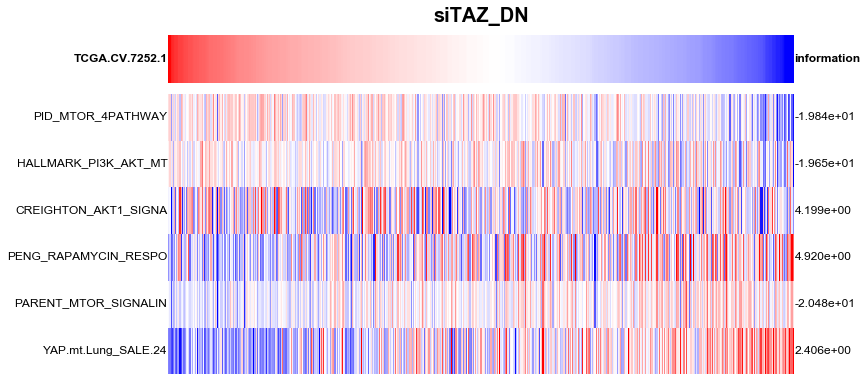

<21:29:32.193007> Saved the figure as ../../data/sample_output/siTAZ_DN.pdf.
<21:29:32.286520> Saved the result as ../../data/sample_output/siTAZ_DN.txt.
<21:29:32.286661> Computing features vs. siYAP_DN (2/3) using information metric ...
<21:29:32.286813> Using 566 intersecting columns from features and ref, which have 567 and 566 columns respectively ...
<21:29:35.085925> Plotting top 0.95 features vs. ref ...
<21:29:35.085989> Normalizing continuous features and ref ...


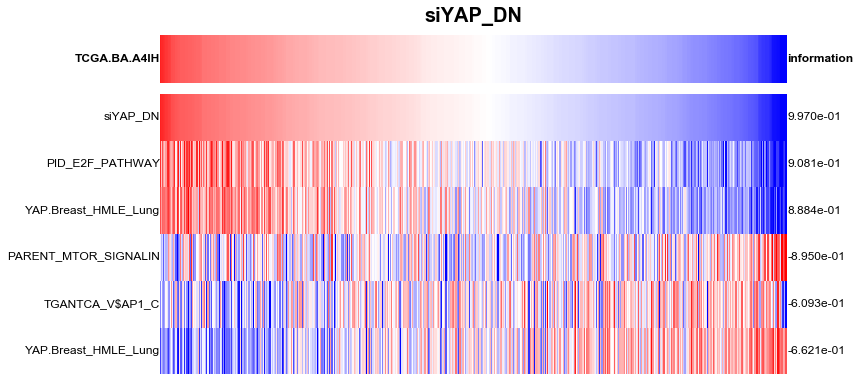

<21:29:40.282778> Saved the figure as ../../data/sample_output/siYAP_DN.pdf.
<21:29:40.368231> Saved the result as ../../data/sample_output/siYAP_DN.txt.
<21:29:40.368357> Computing features vs. siYAP_TAZ_DN (3/3) using information metric ...
<21:29:40.368496> Using 566 intersecting columns from features and ref, which have 567 and 566 columns respectively ...
<21:29:43.162964> Plotting top 0.95 features vs. ref ...
<21:29:43.163033> Normalizing continuous features and ref ...


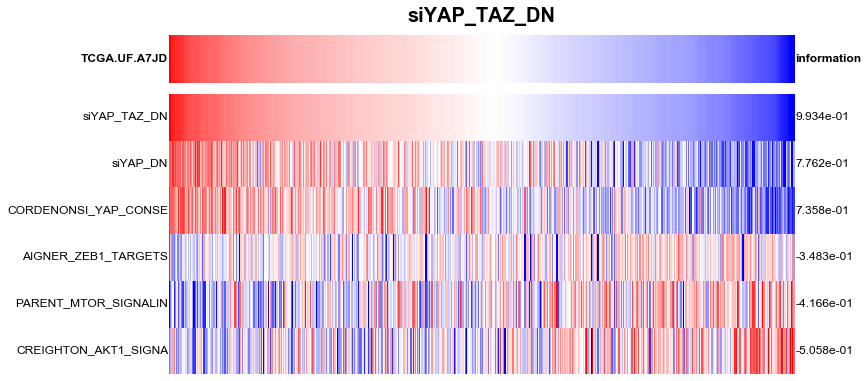

<21:29:48.893073> Saved the figure as ../../data/sample_output/siYAP_TAZ_DN.pdf.
<21:29:48.979076> Saved the result as ../../data/sample_output/siYAP_TAZ_DN.txt.


In [4]:
ccal.analyze.rank_features_against_references(features, refs, 'information', ref_type='continuous', relationship='direct',
                                              sort_ref=True, n_features_to_plot=0.95, max_feature_name_size=20, output_directory=output_directory)

# compare_features_against_features

<21:31:20.864100> Features 1 siTAZ_DN (1/3) vs. features 2 ...
<21:31:21.004755> Features 1 siYAP_DN (2/3) vs. features 2 ...
<21:31:21.139884> Features 1 siYAP_TAZ_DN (3/3) vs. features 2 ...
<21:31:21.269289> Plotting the resulting matrix ...


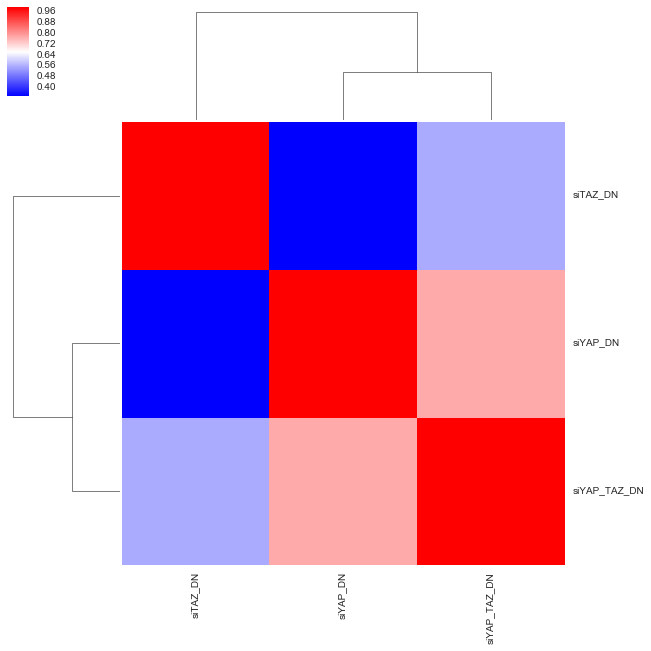

In [7]:
ccal.analyze.compare_features_against_features(refs, refs)

<21:32:28.314601> Features 1 siTAZ_DN (1/3) vs. features 2 ...
<21:32:28.455164> Features 1 siYAP_DN (2/3) vs. features 2 ...
<21:32:28.612783> Features 1 siYAP_TAZ_DN (3/3) vs. features 2 ...
<21:32:28.741486> Converting association to is_distance (is_distance = 1 - association) ...
<21:32:28.741662> Plotting the resulting matrix ...


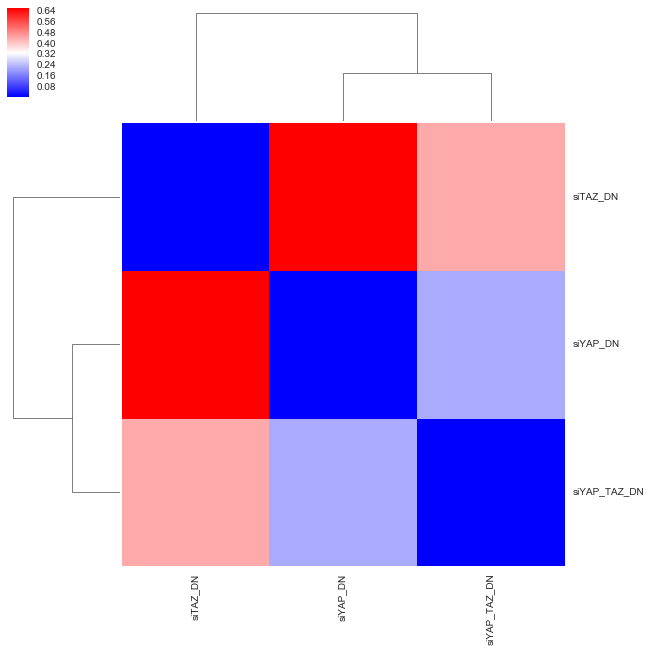

In [4]:
ccal.analyze.compare_features_against_features(refs, refs, is_distance=True)

# nmf

<21:32:38.757617> Performing NMF with k=3 ...
<21:32:38.778666> 	Plotting W and H matrices ...


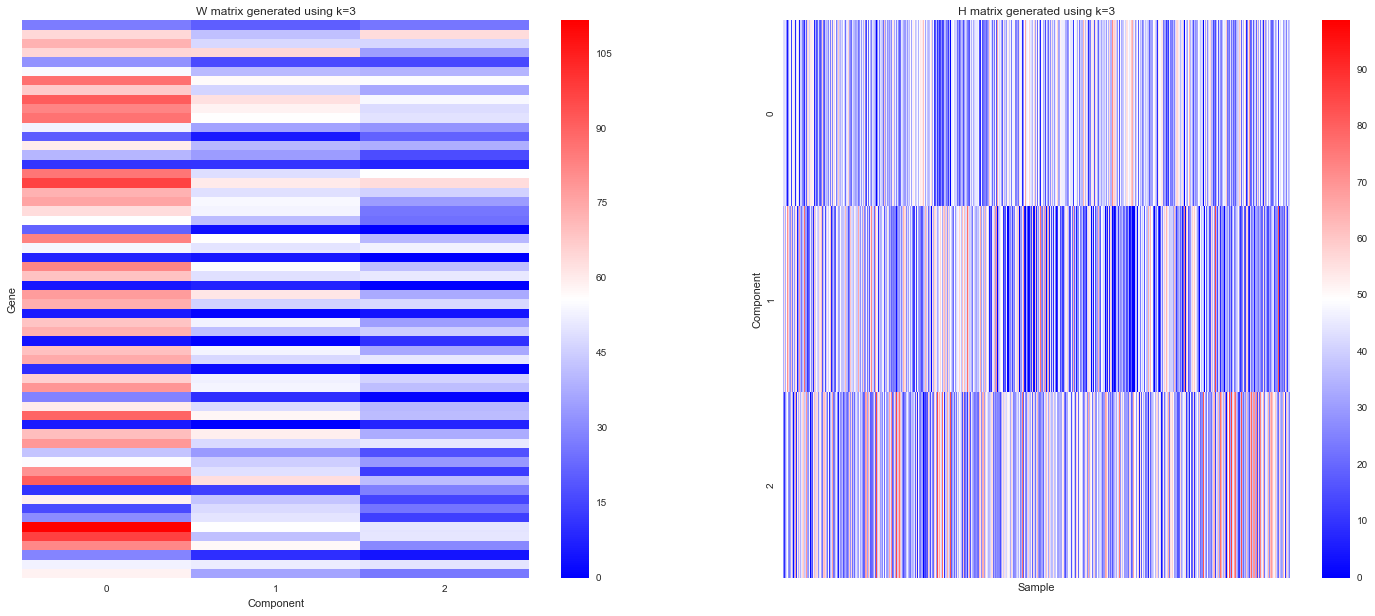

In [6]:
nmf_results = ccal.analyze.nmf(features.abs(), [3], plot=True)

# runtime

<21:32:57.800117> Getting runtime with vectors (x, y) with size 10 ...
<21:32:57.827219> Getting runtime with vectors (x, y) with size 20 ...
<21:32:57.854430> Getting runtime with vectors (x, y) with size 30 ...
<21:32:57.877962> Getting runtime with vectors (x, y) with size 40 ...
<21:32:57.901123> Getting runtime with vectors (x, y) with size 50 ...
<21:32:57.923589> Getting runtime with vectors (x, y) with size 60 ...
<21:32:57.946894> Getting runtime with vectors (x, y) with size 70 ...
<21:32:57.969403> Getting runtime with vectors (x, y) with size 80 ...
<21:32:58.011650> Getting runtime with vectors (x, y) with size 90 ...
<21:32:58.034746> Getting runtime with vectors (x, y) with size 100 ...
<21:32:58.062596> Plotting size vs. time ...


([10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 [0.027014970779418945,
  0.02714991569519043,
  0.023476839065551758,
  0.023107051849365234,
  0.022402048110961914,
  0.02324390411376953,
  0.02245616912841797,
  0.04220223426818848,
  0.023038864135742188,
  0.027771949768066406])

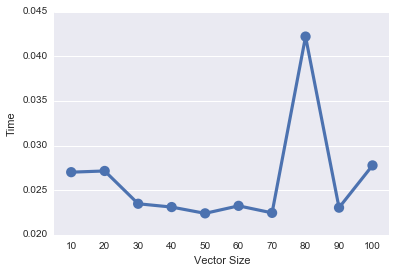

In [7]:
ccal.support.runtime(ccal.information.information_coefficient, n_range=range(10))